# Job outcomes of students who graduated from college between 2010 and 2012

This is an analysis of job outcomes per major for graduates of college between 2010-2012. Each row is a major and the columns are as follows. This data is originally from a survey by the [American Community Survey](https://www.census.gov/programs-surveys/acs/) and was cleaned and aggregated by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors).
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [3]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

## Basic data exploration

In [18]:
print("First row:\n", recent_grads.iloc[1], '\n', sep='')
print("Data head:\n", recent_grads.head(), '\n', sep='')
print("Data tail:\n", recent_grads.tail(), '\n', sep='')
print("Data desribe:\n", recent_grads.describe(), '\n', sep='')

First row:
Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000

## Drop rows with missing values

In [19]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count, cleaned_data_count)

173 172


## Scatter plots of different relations

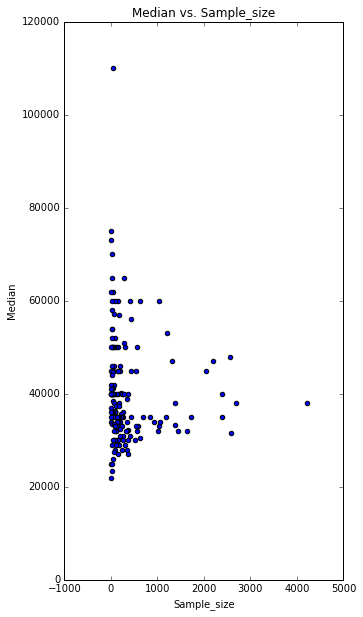

In [22]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size', figsize=(5,10))

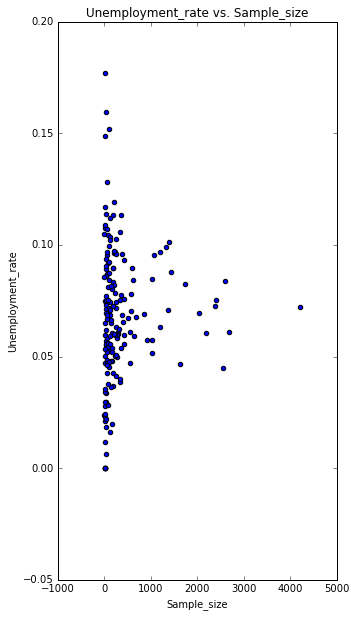

In [23]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment_rate vs. Sample_size', figsize=(5,10))

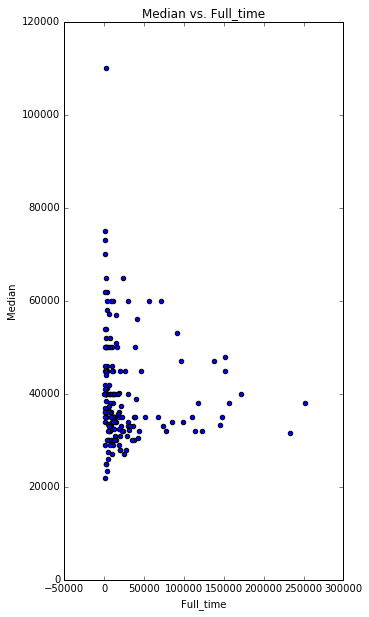

In [24]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs. Full_time', figsize=(5,10))

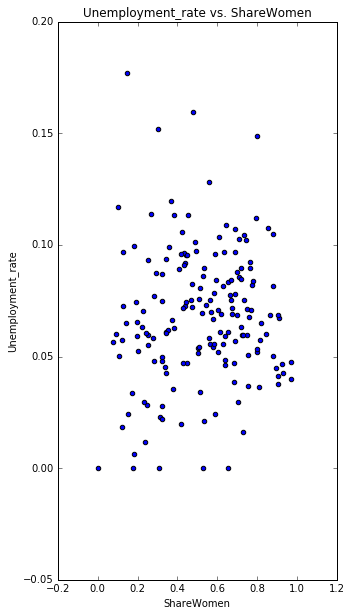

In [25]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Unemployment_rate vs. ShareWomen', figsize=(5,10))

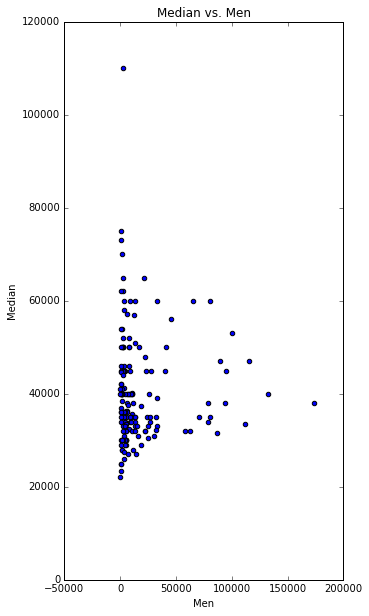

In [26]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Median vs. Men', figsize=(5,10))

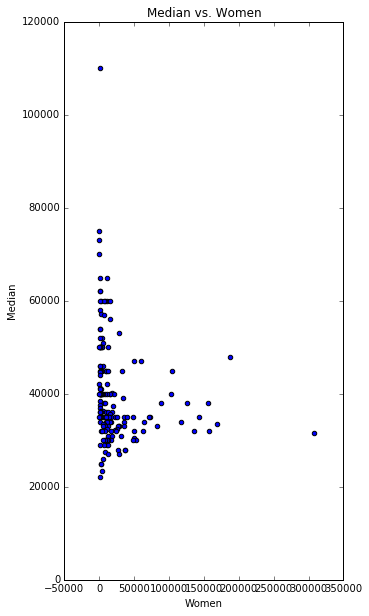

In [27]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Median vs. Women', figsize=(5,10))

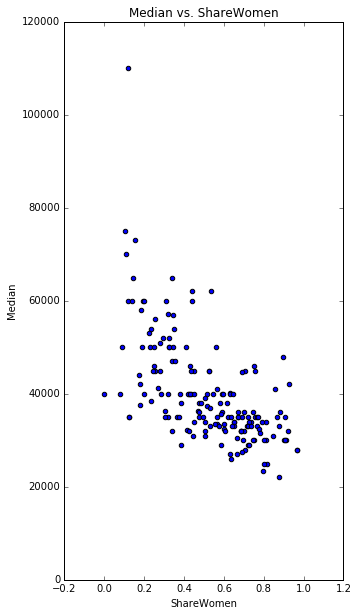

In [28]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Median vs. ShareWomen', figsize=(5,10))

### Questions for scatter plots:
Do students in more popular majors make more money?
* There isn't a strong correlation of more popular majors making more money. If anything, the most popular majors make less money.

Do students that majored in subjects that were majority female make more money?
* In Median vs ShareWomen, there is a weak negative correlation such that the higher the share of women for a major, the less money they made.

Is there any link between the number of full-time employees and median salary?
* Based on the density of the scattor plot distribution, the more likely a major had higher numbers of full-time workers, the less money was made.

## Histogram-based analysis

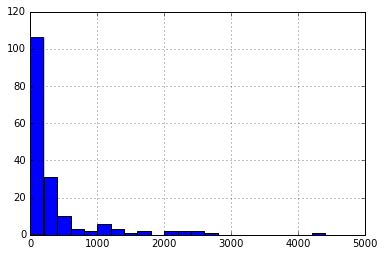

In [29]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

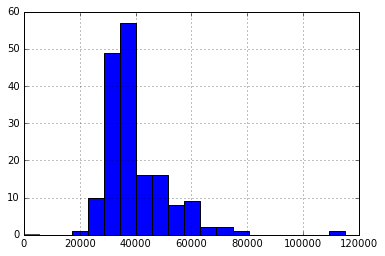

In [40]:
recent_grads['Median'].hist(bins=20, range=(0,115000))

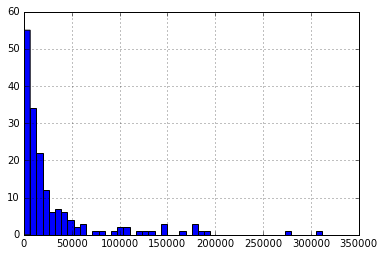

In [34]:
recent_grads['Employed'].hist(bins=50, range=(0,325000))

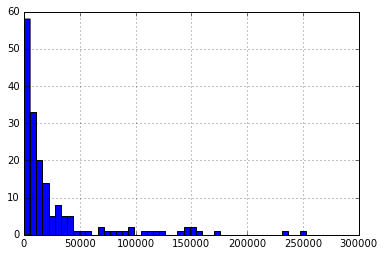

In [35]:
recent_grads['Full_time'].hist(bins=50, range=(0,275000))

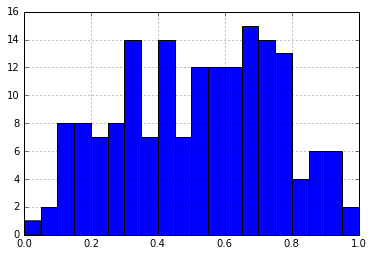

In [36]:
recent_grads['ShareWomen'].hist(bins=20, range=(0,1))

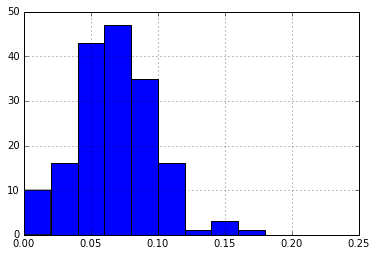

In [37]:
recent_grads['Unemployment_rate'].hist(bins=10, range=(0,.2))

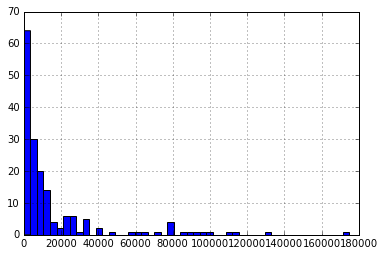

In [38]:
recent_grads['Men'].hist(bins=50, range=(0,175000))

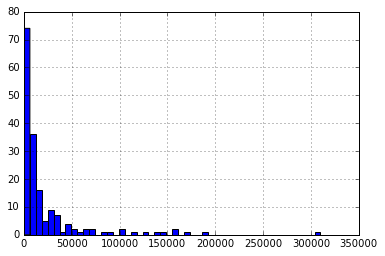

In [39]:
recent_grads['Women'].hist(bins=50, range=(0,310000))

### Questions for Histogram analysis

* What percent of majors are predominantly male? Predominantly female?

Based on the ShareWomen graph, less than 50% of majors are predominantly male and greater than 50% are female.

* What's the most common median salary range?

The most command median salary range is around $30k - $40k

## Analysis with scatter matrix plots

In [42]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2967687f0>,
      dtype=object)

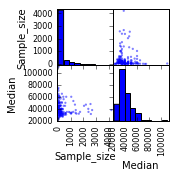

In [43]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(2,2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2965efa20>,
      dtype=object)

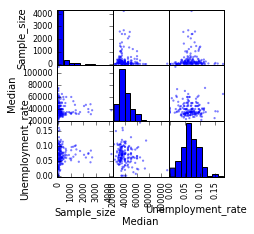

In [45]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(3,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc29620ae10>,
      dtype=object)

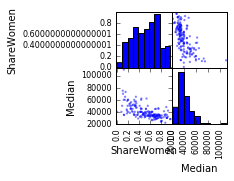

In [46]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(2,2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc29608abe0>,
      dtype=object)

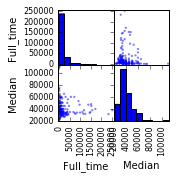

In [47]:
scatter_matrix(recent_grads[['Full_time', 'Median']], figsize=(2,2))

## Analysis with bar plots

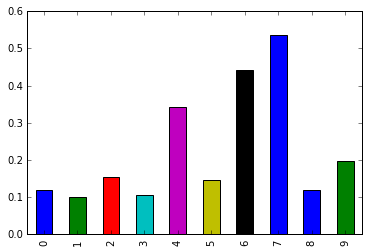

In [48]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

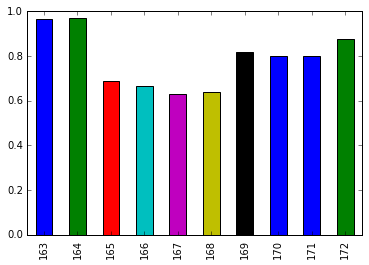

In [49]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

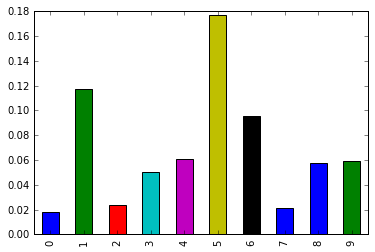

In [50]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

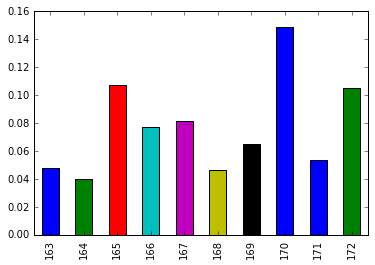

In [51]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

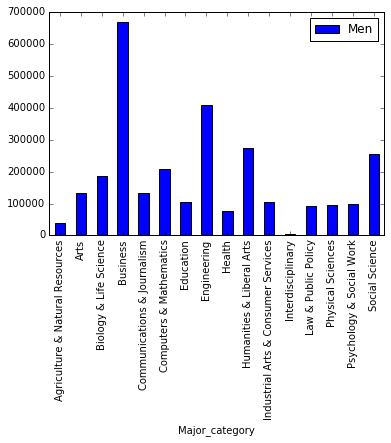

In [60]:
#recent_grads[["Men", "Major_category"]].plot.bar()
import numpy as np
table_men = recent_grads.pivot_table(index='Major_category', values='Men', aggfunc=np.sum)
table_men.plot.bar()

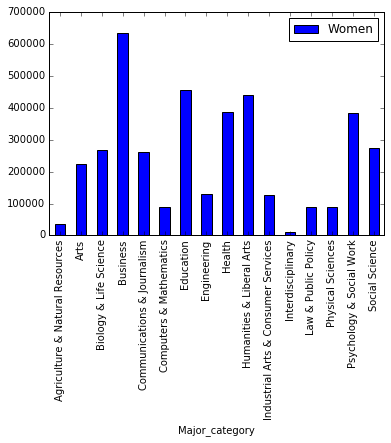

In [61]:
table_women = recent_grads.pivot_table(index='Major_category', values='Women', aggfunc=np.sum)
table_women.plot.bar()